<h1> DS200A Computer Vision Assignment</h1>

<h2>  Part One: Data Preparation </h2>	


<h3>  Import Statements </h3>	


In [68]:
#Import anything you need here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib
import skimage
from skimage import data
from skimage import io
import os
from pathlib import Path

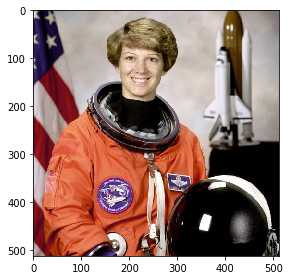

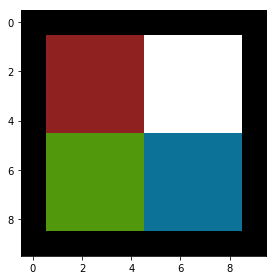

Pictures  Encoding
0  [[[154, 147, 151], [109, 103, 124], [63, 58, 1...         1
1  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...         2

In [7]:
#Example of reading in a file

# ### Staff-provided example is broken!
# filename = os.path.join(skimage.data_dir, 'd.jpg')
# dog = io.imread(filename)
# skimage.io.imshow(dog)

# plt.show()
# filename2 = os.path.join(skimage.data_dir, 'c.jpg')
# cat = io.imread(filename2)
# example_data_frame= pd.DataFrame()


# example_data_frame['Pictures']=[dog, cat]
# example_data_frame['Encoding']=[1,2]
# example_data_frame

filename = os.path.join(skimage.data_dir, 'astronaut.png')
astronaut = io.imread(filename)
skimage.io.imshow(astronaut)
plt.show()

filename2 = os.path.join(skimage.data_dir, 'block.png')
block = io.imread(filename2)
skimage.io.imshow(block)
plt.show()

example_data_frame= pd.DataFrame()
example_data_frame['Pictures']=[astronaut,block]
example_data_frame['Encoding']=[1,2]
example_data_frame

<h4> Using the code for reference, take the given folder and create a dataframe with the picture object, and the encoding as listed below. </h4>	
0=Airplanes, 1=Bear, 2=Blimp, 3=Comet, 4=Crab, 5=Dog, 6=Dolphin, 7=Giraffe, 8=Goat, 9=Gorilla, 10=Kangaroo, 11=Killer-Whale, 12=Leopards, 13=Llama, 14= Penguin, 15= Porcupine, 16=Teddy-Bear, 17=Triceratops, 18=Unicorn, 19=Zebra

In [16]:
cd /Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject/20_categories_training/airplanes

/Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject/20_categories_training/airplanes


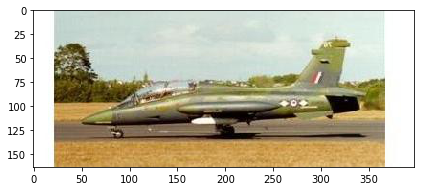

In [20]:
file_path = '/Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject/20_categories_training/airplanes/'
filename = os.path.join(file_path, 'airplanes_0001.jpg')
pic = io.imread(filename)
skimage.io.imshow(pic)

In [1]:
### Create a dictionary to assign numbers to folder names
folder_names_list = ['airplanes', 'bear', 'blimp', 'comet', 'crab', 'dog', 'dolphin', 'giraffe', 'goat', 'gorilla', 'kangaroo', 'killer-whale', 'leopards', 'llama', 'penguin', 'porcupine', 'teddy-bear', 'triceratops', 'unicorn', 'zebra']
encoding_list = range(20)
encoding = dict(zip(folder_names_list, encoding_list))

def read_organize_data(file_path):
    #Fill this function out, should return a dataframe with picture object, and correct encoding
    
#     rootdir = '/Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject/20_categories_training/'
    pictures = []
    labels = []
    for subdir, dirs, files in os.walk(file_path):
        for file in files:
            if file[0]!='.': ## avoid hidden files
                folder = subdir.split(os.path.sep)[-1] # gets the folder name, i.e. 'dog'
                pic = io.imread(os.path.join(subdir, file))
                label = encoding[folder]

                pictures.append(pic)
                labels.append(label)
    
    df = pd.DataFrame()
    df['Pictures'] = pictures
    df['Encoding'] = labels
    return df  

In [39]:
start_path = '/Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject/20_categories_training/'
starting_data = read_organize_data(start_path)

In [41]:
starting_data.head()

Pictures  Encoding
0  [[[143, 142, 147], [222, 221, 226], [205, 204,...         9
1  [[[106, 109, 116], [105, 108, 115], [100, 103,...         9
2  [[[125, 141, 140], [103, 119, 118], [89, 105, ...         9
3  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...         9
4  [[[119, 122, 103], [104, 107, 88], [102, 105, ...         9

In [69]:
### Save the data frame 

data_file = Path('/Users/will/Documents/Berkeley/Classes/DS100/Projects/GradProject', "labeled_pics.hdf") # Path of hdf file
starting_data.to_hdf(data_file, "starting_data")

/Users/will/anaconda3/envs/data100/lib/python3.6/site-packages/pandas/core/generic.py:1996: PerformanceWarning: 
your performance may suffer as PyTables will pickle object types that it cannot
map directly to c-types [inferred_type->mixed,key->block0_values] [items->['Pictures']]

  return pytables.to_hdf(path_or_buf, key, self, **kwargs)
